In [2]:
#libraries for loading and manipulating data.
import numpy as np
import pandas as pd

#libraries for NLP and text preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string 

#libraries for visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# set plot style
sns.set()

In [3]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [67]:
##Analytics Vidya
import os
from scipy.stats import randint


from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Loading Data

In [6]:

# Preview train dataset

link_train = 'https://drive.google.com/file/d/1x6G7wbtMAl_9B7xEwk6v7rWUz5Cy4hyW/view?usp=sharing'
link_test = 'https://drive.google.com/file/d/1zyoq8r4rkkPDMgriAUh1YDx5hVT5Sr_j/view?usp=sharing'
id_train = link_train.split('/')[-2]
id_test = link_test.split('/')[-2]




print(id)
# print(fluff)
# dd = 
downloaded_train = drive.CreateFile({'id':id_train})
downloaded_test = drive.CreateFile({'id':id_test}) 



downloaded_train.GetContentFile('train.csv')
downloaded_test.GetContentFile('test.csv')

speech_train=pd.read_csv("train.csv")
speech_test=pd.read_csv("test.csv")

<built-in function id>


In [7]:
SEED = 1

In [8]:
speech_train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

In [9]:
speech_test.columns

Index(['message', 'tweetid'], dtype='object')

## EDA
* Shape of the data
* Check if there are any null entries 
* Distinct sentiment types and frequency of each in dataset (bar graph representation)
* Duplicate entries (tweetid)
* Most common words before data cleaning (word cloud)

In [ ]:
# General eda 
def eda (df):
    shape = df.shape
    null_entries = df.isnull().sum()
    dist_sent = list(df.sentiment.unique())
    duplicate = df.columns.duplicated().any()
    
    # summary
    a = print ('Shape of dataframe is ' + str(shape[0]) + ' rows and ' + str(shape[1]) + ' columns')
    b = print ('Unique sentiemnts are: ' +  str(dist_sent))
    c = print ('Duplicate entries: ', duplicate)
    d = print ('Checking for null entries in each column:\n' ,null_entries)
    
    return a,b,c,d

eda(speech_train)

Shape of dataframe is 15819 rows and 3 columns
Unique sentiemnts are: [1, 2, 0, -1]
Duplicate entries:  False
Checking for null entries in each column:
 sentiment    0
message      0
tweetid      0
dtype: int64


(None, None, None, None)

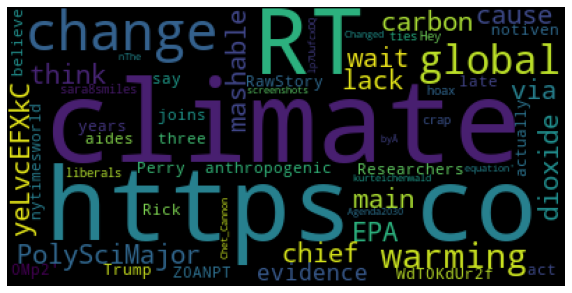

In [ ]:
#Graphical EDA (wordcloud)
def word_cloud (df, column_name):
    wc = WordCloud()
    text = df[column_name].values
    msg_cloud = wc.generate(str(text))
    
    #plot wordcloud
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot
    plt.imshow(msg_cloud)
    plt.axis('off')
    plt.show
    
    return wc

word_cloud(speech_train, 'message')

Word cloud summary:
* There are a lot or url links in the text (https)
* Frequently used specific words RELEVANT to climate change are: climate, global, warming, change, EPA( United States Environmental Protection Agency, dioxide, RT(a news network), CO (carbon monoxide), mashable(a news network), think, cause, change, evidence 

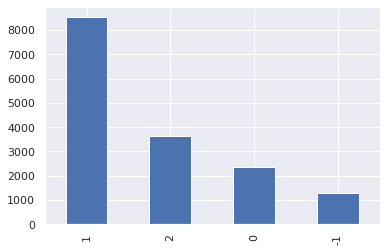

In [ ]:
#Graphical EDA (bar graphs), How many data samples are provided for each sentiment
def bar_graph(df, column_name):
    bar = df[column_name].value_counts().plot(kind = 'bar')
    plt.show()
    return bar

bar_graph(speech_train, 'sentiment')

Bar graph summary:
* Samples of sentiment 1 are the most while samples of sentiment -1 are the least in the dataset
* 1 are pro climate change i.e the tweet supports the belief of man-made climate change
* -1 are anti climate change i.e the tweet does not believe in man-made climate change

# Feature Engineering
Noise removal involves removing any piece of information that is not relevant:
* Remove punctuation
* Remove urls 
* Remove stopwords
* Remove twitter handles (e.g @name)

Word normalization
* Tokenize the text (use TweetTokenizer)
* Perform stemming 
* Perform lammetization 
* Convert all text to lowercase
* Create features out of the text (use CountVectorize or TIF-ID)

In [ ]:
#remove noise
def remove_noise(df, column_name):
    #remove twitter handles 
    handles = re.findall(r"@(w+)", df[column_name])
    df[column_name] = df[column_name].replace(to_replace = handles, value = '', regex = True)
    
    #remove urls
    url_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    df[column_name] = df[column_name].replace(to_replace = url_pattern, value = '', regex = True)
    
    #remove puntuation
    remove_punctuation = ''.join([l for l in post if l not in string.punctuation])
    df[column_name] = train_set['message'].apply(remove_punctuation)
    
    #remove stopwords 
    
    

In [95]:
def preprocess(df, frame_type="train"):
  print("lendf")
  print(len(df))
  input_df = df.copy(deep=True)
  column_name = 'message'
  #remove retweet marks (RT)
  rt_marks = r'RT+'
  # rt_mrks = r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)' 
  # df[column_name] = df[column_name].replace(to_replace = rt_mrks, value = '', regex = True)

  #remove urls
  url_pattern =r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+' 
  df[column_name] = df[column_name].replace(to_replace = url_pattern, value = '', regex = True)

  #remove single numeric terms
  numeric_terms = r'[0-9]' 
  df[column_name] = df[column_name].replace(to_replace = numeric_terms, value = '', regex = True)
  if frame_type == "train":
    input_df.drop(['tweetid','sentiment'], axis = 1, inplace = True)
  else:
    input_df.drop(['tweetid'], axis = 1, inplace = True)

  # tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
  #                       ngram_range=(1, 2), 
  #                       stop_words='english')
  # features = tfidf.fit_transform(input_df.message.values).toarray()
  # print("lendf")
  # print(len(features))

  # input_df['message_tr'] = features
  return input_df


In [96]:
clean_train  = preprocess(speech_train)

lendf
15819


In [97]:
clean_train.head()

,message
0,PolySciMajor EPA chief doesnt think carbon dio...
1,Its not like we lack evidence of anthropogenic...
2,Researchers say we have three years to act o...
3,TodayinMaker WIRED was a pivotal year in the...
4,Its and a racist sexist climate change deny...


In [98]:
speech_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesnt think carbon dio...,625221
1,1,Its not like we lack evidence of anthropogenic...,126103
2,2,Researchers say we have three years to act o...,698562
3,1,TodayinMaker WIRED was a pivotal year in the...,573736
4,1,Its and a racist sexist climate change deny...,466954


In [31]:
clean_test = preprocess(speech_test, frame_type='test' )

lendf
10546


In [44]:
X = clean_train['message']
y = speech_train['sentiment'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [45]:
tfidf= TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2),stop_words='english')

In [49]:
tfidf2= TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2),stop_words='english')

In [53]:
X_train_vect  = tfidf.fit_transform(clean_train['message'].values)

In [39]:
# X_test_vect = tfidf.fit_transform(X_test.values)

In [54]:
X_speech_test_vect = tfidf.transform(clean_test['message'].values)

In [60]:
# sdg = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
# sdg = LinearSVC()
sdg =LogisticRegression(random_state=SEED)

sdg.fit(X_train_vect, speech_train['sentiment'])
y_sdg =  sdg.predict(X_speech_test_vect)
print(len(y_sdg))
output = pd.DataFrame({'tweetid': speech_test['tweetid'], 'sentiment': y_sdg})
output.to_csv('LR232.csv', index=False)
files.download('LR232.csv')

10546


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
def evaluate(model,X_train,y_train, X_test, y_test):
  model.fit(X_train, y_train )
  y_pred = model.predict(X_test)
  model_name = model.__class__.__name__ 
  print("================================="+model_name+"=================================================")
  print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
  print('\n')
  print(f'Confusion matrix score: {confusion_matrix(y_test, y_pred)}')
  print('\n')
  print("Classification")
  print(f'{classification_report(y_test, y_pred)}')
  

In [ ]:
models = [
      RandomForestClassifier(n_estimators=100, max_depth=5, random_state=SEED),
      LinearSVC(),
      MultinomialNB(),
      LogisticRegression(random_state=SEED),
      DecisionTreeClassifier(max_depth=7, random_state =SEED),
      SVC(),
      SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
      AdaBoostClassifier(n_estimators=100),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,   max_depth=1, random_state=SEED)
]

In [68]:
kn = KNeighborsClassifier (n_neighbors=2, algorithm='ball_tree')

In [70]:
evaluate(kn, tfidf.fit_transform(X_train.values),y_train, tfidf.transform(X_test.values) , y_test)

=================================KNeighborsClassifier=================================================
Accuracy score: 0.5518331226295828


Confusion matrix score: [[ 103   86   42   18]
 [  82  246  119   26]
 [ 169  360 1060  112]
 [  39  123  242  337]]


Classification
              precision    recall  f1-score   support

          -1       0.26      0.41      0.32       249
           0       0.30      0.52      0.38       473
           1       0.72      0.62      0.67      1701
           2       0.68      0.45      0.55       741

    accuracy                           0.55      3164
   macro avg       0.49      0.50      0.48      3164
weighted avg       0.62      0.55      0.57      3164



In [89]:
ln = LinearSVC()

In [90]:
evaluate(ln, tfidf.fit_transform(X_train.values),y_train, tfidf.transform(X_test.values) , y_test)

=================================LinearSVC=================================================
Accuracy score: 0.7038558786346397


Confusion matrix score: [[  90   34  103   22]
 [  30  187  205   51]
 [  39   99 1414  149]
 [   9   22  174  536]]


Classification
              precision    recall  f1-score   support

          -1       0.54      0.36      0.43       249
           0       0.55      0.40      0.46       473
           1       0.75      0.83      0.79      1701
           2       0.71      0.72      0.72       741

    accuracy                           0.70      3164
   macro avg       0.63      0.58      0.60      3164
weighted avg       0.69      0.70      0.69      3164



In [ ]:
for model in models:
  evaluate(model,X_train,y_train, X_test, y_test)

=================================RandomForestClassifier=================================================
Accuracy score: 0.5395701643489255


Confusion matrix score: [[   0    0  325    0]
 [   0    0  589    0]
 [   0    0 2134    0]
 [   0    0  907    0]]


Classification
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       325
           0       0.00      0.00      0.00       589
           1       0.54      1.00      0.70      2134
           2       0.00      0.00      0.00       907

    accuracy                           0.54      3955
   macro avg       0.13      0.25      0.18      3955
weighted avg       0.29      0.54      0.38      3955

=================================LinearSVC=================================================
Accuracy score: 0.7213653603034134


Confusion matrix score: [[ 145   45  105   30]
 [  28  249  259   53]
 [  37  110 1797  190]
 [   7   32  206  662]]


Classification
              precision   

In [ ]:
models2 = [ SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
      AdaBoostClassifier(n_estimators=100),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,   max_depth=1, random_state=SEED)
]
for model in models2:
  evaluate(model,X_train,y_train, X_test, y_test)

=================================SGDClassifier=================================================
Accuracy score: 0.7284450063211125


Confusion matrix score: [[ 158   25  127   15]
 [  38  211  306   34]
 [  38   64 1924  108]
 [  14   20  285  588]]


Classification
              precision    recall  f1-score   support

          -1       0.64      0.49      0.55       325
           0       0.66      0.36      0.46       589
           1       0.73      0.90      0.81      2134
           2       0.79      0.65      0.71       907

    accuracy                           0.73      3955
   macro avg       0.70      0.60      0.63      3955
weighted avg       0.72      0.73      0.71      3955

=================================AdaBoostClassifier=================================================
Accuracy score: 0.6237673830594185


Confusion matrix score: [[ 105   33  177   10]
 [  14  177  370   28]
 [  31   91 1861  151]
 [  12   31  540  324]]


Classification
              precision   